Ideal Output & Deliverables

The ideal output of this project will be:
A dashboard that implements predictive models to find what helps/harms a student's progression through school. 
A final report answers the Base Question:
What are the best predictors of student retention (i.e., the prevention of student dropouts)?

https://docs.google.com/document/d/1XHfDhUMD1c868baqg_8Kk4j2PJzwHRX8Psf7PTKLgss/edit?tab=t.0

In [3]:
import pandas as pd
import numpy as np

# Uganda Data

### Load in Data

In [6]:
df_Uganda = pd.read_excel("/Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/Uganda - 2024 10 02(v1).xlsx",
                         sheet_name="ug_fact_student_attendance")

In [7]:
df_Uganda['StudentIsPresent'].value_counts()

StudentIsPresent
True     793798
False    155987
Name: count, dtype: int64

In [8]:
df_Uganda.head()

,MonthYear,GradeId,StudentIsPresent,ReasonType,StudentAbsenseReason,StudentAttendanceDate,ClassID,ChildrenId,ExistedClasId,WeekDayN,...,MonthYearSort,AcademicYearId,AcademicYearName,Year,Project,Gender,Cycle,RecordId,AcademicYearStartDate,AcademicYearEndtDate
0,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28503,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Female,Literacy-Cycle 1,182765,2022-09-04,2023-01-13
1,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28504,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Male,Literacy-Cycle 1,182766,2022-09-04,2023-01-13
2,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28505,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Male,Literacy-Cycle 1,182767,2022-09-04,2023-01-13
3,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28506,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Male,Literacy-Cycle 1,182768,2022-09-04,2023-01-13
4,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28507,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Female,Literacy-Cycle 1,182769,2022-09-04,2023-01-13


In [9]:
df_Uganda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949785 entries, 0 to 949784
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   MonthYear              949785 non-null  datetime64[ns]
 1   GradeId                949785 non-null  int64         
 2   StudentIsPresent       949785 non-null  bool          
 3   ReasonType             155987 non-null  object        
 4   StudentAbsenseReason   155987 non-null  object        
 5   StudentAttendanceDate  949785 non-null  object        
 6   ClassID                949785 non-null  int64         
 7   ChildrenId             949785 non-null  int64         
 8   ExistedClasId          949785 non-null  bool          
 9   WeekDayN               949785 non-null  int64         
 10  SchoolId               949785 non-null  int64         
 11  ClassName              949785 non-null  object        
 12  Week                   949785 non-null  obje

In [10]:
df_Uganda.describe()

,MonthYear,GradeId,ClassID,ChildrenId,WeekDayN,SchoolId,WeekNum,MonthYearSort,AcademicYearId,Year,RecordId,AcademicYearStartDate,AcademicYearEndtDate
count,949785,949785.000000,949785.000000,949785.000000,949785.000000,949785.000000,949785.000000,949785.000000,877753.000000,877753.000000,949785.000000,877753,877753
mean,2023-03-22 07:30:03.928678400,6.158040,3057.990023,37491.353715,3.003385,172.350223,29.156406,202278.719590,30.192762,2022.735281,476124.799743,2023-03-13 09:22:22.886665984,2023-07-20 09:51:32.634488832
min,2021-08-01 00:00:00,1.000000,1879.000000,20999.000000,1.000000,88.000000,1.000000,202108.000000,21.000000,2022.000000,1.000000,2022-01-03 00:00:00,2022-06-15 00:00:00
25%,2022-11-01 00:00:00,2.000000,2473.000000,29035.000000,2.000000,143.000000,15.000000,202211.000000,25.000000,2022.000000,238595.000000,2022-11-01 00:00:00,2023-03-31 00:00:00
50%,2023-05-01 00:00:00,3.000000,3178.000000,37887.000000,3.000000,167.000000,33.000000,202305.000000,30.000000,2023.000000,476344.000000,2023-04-03 00:00:00,2023-09-01 00:00:00
75%,2023-10-01 00:00:00,4.000000,3596.000000,45404.000000,4.000000,206.000000,43.000000,202310.000000,34.000000,2023.000000,713846.000000,2023-07-15 00:00:00,2023-12-15 00:00:00
max,2024-02-01 00:00:00,27.000000,4025.000000,54814.000000,7.000000,271.000000,53.000000,202402.000000,41.000000,2024.000000,951323.000000,2024-01-02 00:00:00,2024-05-16 00:00:00
std,NaN,7.208931,623.034401,9472.144651,1.458241,49.032464,15.239789,70.215601,5.727238,0.606958,274502.726138,NaN,NaN


### Prep Data

In [12]:
# Convert boolean columns to int64 (False = 0, True = 1)
boolean_columns = df_Uganda.select_dtypes(include='bool').columns
df_Uganda[boolean_columns] = df_Uganda[boolean_columns].astype(float)

In [13]:
df_Uganda['StudentAttendanceDate'] = df_Uganda['StudentAttendanceDate'].astype('datetime64[ns]')
columns_to_convert = ['ReasonType', 'StudentAbsenseReason', 'AcademicYearName', 'Project', 'Gender', 'Cycle']
df_Uganda[columns_to_convert] = df_Uganda[columns_to_convert].astype('category')

In [14]:
df_Uganda = df_Uganda.select_dtypes(exclude=['datetime64[ns]', 'object'])

In [15]:
df_Uganda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949785 entries, 0 to 949784
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   GradeId               949785 non-null  int64   
 1   StudentIsPresent      949785 non-null  float64 
 2   ReasonType            155987 non-null  category
 3   StudentAbsenseReason  155987 non-null  category
 4   ClassID               949785 non-null  int64   
 5   ChildrenId            949785 non-null  int64   
 6   ExistedClasId         949785 non-null  float64 
 7   WeekDayN              949785 non-null  int64   
 8   SchoolId              949785 non-null  int64   
 9   WeekNum               949785 non-null  int64   
 10  MonthYearSort         949785 non-null  int64   
 11  AcademicYearId        877753 non-null  float64 
 12  AcademicYearName      877753 non-null  category
 13  Year                  877753 non-null  float64 
 14  Project               877753 non-nul

In [16]:
overall_retention_rate = df_Uganda['StudentIsPresent'].mean()
print(f'Overall Student Retention Rate: {overall_retention_rate:.2%}')

Overall Student Retention Rate: 83.58%


/var/folders/sf/c0xndf0951l35zqvq0zt2vy00000gn/T/ipykernel_65378/68507526.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_retention_rate = filtered_df.groupby('Gender')['StudentIsPresent'].mean()


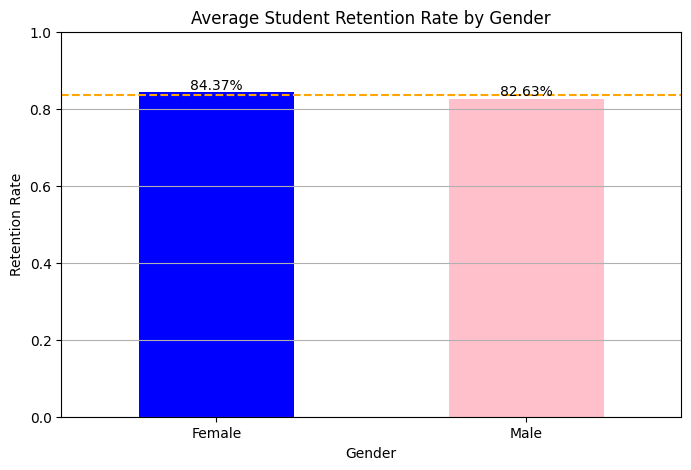

In [17]:
import matplotlib.pyplot as plt

# Filter out rows where 'Gender' is 'unknown'
filtered_df = df_Uganda[df_Uganda['Gender'] != 'unknown']

# Calculate the retention rate by gender
gender_retention_rate = filtered_df.groupby('Gender')['StudentIsPresent'].mean()

# Ensure the bar plot only includes known genders
gender_retention_rate = gender_retention_rate[gender_retention_rate.index.isin(['Male', 'Female'])]

plt.figure(figsize=(8, 5))
bars = gender_retention_rate.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Student Retention Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Retention Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.axhline(y=gender_retention_rate.mean(), color='orange', linestyle='--')
plt.grid(axis='y')

# Annotate the bars with the retention rates
for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2%}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 fontsize=10, color='black')

plt.show()

In [18]:
df_Uganda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949785 entries, 0 to 949784
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   GradeId               949785 non-null  int64   
 1   StudentIsPresent      949785 non-null  float64 
 2   ReasonType            155987 non-null  category
 3   StudentAbsenseReason  155987 non-null  category
 4   ClassID               949785 non-null  int64   
 5   ChildrenId            949785 non-null  int64   
 6   ExistedClasId         949785 non-null  float64 
 7   WeekDayN              949785 non-null  int64   
 8   SchoolId              949785 non-null  int64   
 9   WeekNum               949785 non-null  int64   
 10  MonthYearSort         949785 non-null  int64   
 11  AcademicYearId        877753 non-null  float64 
 12  AcademicYearName      877753 non-null  category
 13  Year                  877753 non-null  float64 
 14  Project               877753 non-nul

In [19]:
numeric_df_Uganda = df_Uganda.apply(pd.to_numeric, errors='coerce')
correlation_matrix = numeric_df_Uganda.corr()

target_correlation = correlation_matrix['StudentIsPresent'].sort_values(ascending=False)
target_correlation


StudentIsPresent        1.000000
WeekNum                 0.082679
ClassID                 0.026823
ChildrenId              0.024367
SchoolId                0.022903
RecordId                0.022395
GradeId                 0.020518
AcademicYearId          0.019316
Year                    0.008994
WeekDayN               -0.007368
MonthYearSort          -0.009916
ReasonType                   NaN
StudentAbsenseReason         NaN
ExistedClasId                NaN
AcademicYearName             NaN
Project                      NaN
Gender                       NaN
Cycle                        NaN
Name: StudentIsPresent, dtype: float64

In [20]:
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Updated categorical columns based on df_Uganda
categorical_columns = ['ReasonType', 'StudentAbsenseReason', 'AcademicYearName', 'Project', 'Gender', 'Cycle']

# Fill missing values with the mode (most frequent value) for each categorical column
for col in categorical_columns:
    if df_Uganda[col].isnull().any():
        df_Uganda[col].fillna(df_Uganda[col].mode()[0], inplace=True)

# Calculate Cramér's V for each categorical column against 'StudentIsPresent'
cramers_v_results = {col: cramers_v(df_Uganda[col], df_Uganda['StudentIsPresent']) for col in categorical_columns}
cramers_v_results


/var/folders/sf/c0xndf0951l35zqvq0zt2vy00000gn/T/ipykernel_65378/1772270114.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Uganda[col].fillna(df_Uganda[col].mode()[0], inplace=True)


{'ReasonType': 0.3686417814204601,
 'StudentAbsenseReason': 0.3686417814204601,
 'AcademicYearName': 0.13962247308741818,
 'Project': 0.013384921452980281,
 'Gender': 0.023487318738146874,
 'Cycle': 0.06223680841725574}

### Model

In [22]:
# Set device based on GPU availability
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Utility function to transfer tensors to the selected device
def to_device(tensor):
    return tensor.to(device)

Using device: cpu


In [23]:
predictors = [
    "GradeId",
    "ReasonType",
    "StudentAbsenseReason",
    "ClassID",
    "ChildrenId",
    "WeekDayN",
    "SchoolId",
    "MonthYearSort",
    "AcademicYearId",
    "AcademicYearName",
    "Project",
    "RecordId"
]

Using device: cpu


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2, 4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


LogisticRegression....
Validation Accuracy: 0.92
Test Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.66      0.56     31228
         1.0       0.93      0.86      0.89    158729

    accuracy                           0.83    189957
   macro avg       0.70      0.76      0.72    189957
weighted avg       0.85      0.83      0.84    189957



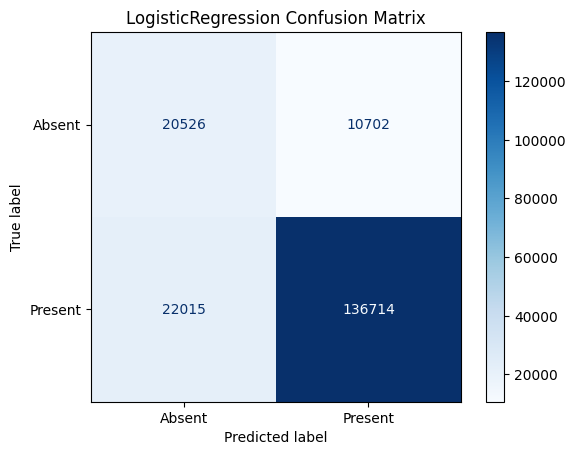

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2, 4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RandomForestClassifier....
Validation Accuracy: 0.77
Test Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.58      0.45     31228
         1.0       0.91      0.80      0.85    158729

    accuracy                           0.77    189957
   macro avg       0.64      0.69      0.65    189957
weighted avg       0.82      0.77      0.78    189957



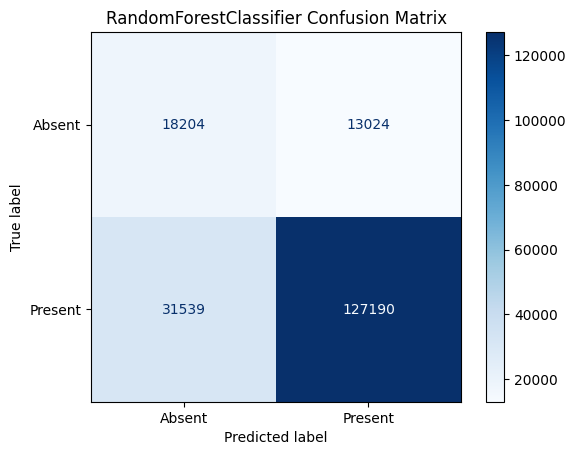

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2, 4, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


DecisionTreeClassifier....
Validation Accuracy: 0.77
Test Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.53      0.43     31228
         1.0       0.90      0.82      0.86    158729

    accuracy                           0.77    189957
   macro avg       0.63      0.68      0.65    189957
weighted avg       0.81      0.77      0.79    189957



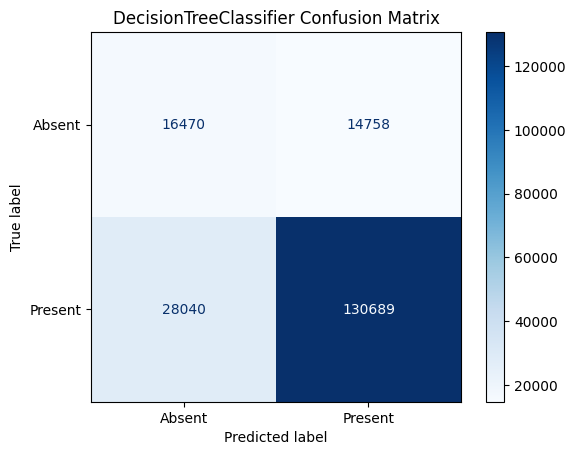

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Set device based on GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data preprocessing and transformation setup
df_Uganda_pred = df_Uganda[['StudentIsPresent'] + predictors]

transformer = make_column_transformer(
    (Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]), predictors),
    remainder="passthrough"
)

X = df_Uganda_pred.drop(columns=["StudentIsPresent"])
y = df_Uganda_pred["StudentIsPresent"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define scikit-learn models
logistic_model = LogisticRegression(max_iter=2000, random_state=0, class_weight='balanced')
rf_model = RandomForestClassifier(
    random_state=0,
    class_weight='balanced',
    n_jobs=1,
    n_estimators=100,
    max_depth=30
)
dt_model = DecisionTreeClassifier(
    random_state=0,
    class_weight='balanced',
    max_depth=10,          
    min_samples_split=10,     
    min_samples_leaf=5        
)

# Evaluate model function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_type='sklearn'):
    if model_type == 'sklearn':
        pipeline = ImbPipeline([
            ('preprocessor', transformer),
            ('undersampler', RandomUnderSampler(sampling_strategy='not majority')),
            ('model', model)
        ])
        pipeline.fit(X_train, y_train)
        y_train_pred = pipeline.predict(X_train)
        y_test_pred = pipeline.predict(X_test)
    # Output results for both model types
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model.__class__.__name__}....")
    print(f"Validation Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    labels = ['Absent', 'Present']
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()
    print("\n" + "="*50 + "\n")

# Evaluate models
evaluate_model(logistic_model, X_train, X_test, y_train, y_test, model_type='sklearn')
evaluate_model(rf_model, X_train, X_test, y_train, y_test, model_type='sklearn')
evaluate_model(dt_model, X_train, X_test, y_train, y_test, model_type='sklearn')

In [25]:
df_Uganda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949785 entries, 0 to 949784
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   GradeId               949785 non-null  int64   
 1   StudentIsPresent      949785 non-null  float64 
 2   ReasonType            949785 non-null  category
 3   StudentAbsenseReason  949785 non-null  category
 4   ClassID               949785 non-null  int64   
 5   ChildrenId            949785 non-null  int64   
 6   ExistedClasId         949785 non-null  float64 
 7   WeekDayN              949785 non-null  int64   
 8   SchoolId              949785 non-null  int64   
 9   WeekNum               949785 non-null  int64   
 10  MonthYearSort         949785 non-null  int64   
 11  AcademicYearId        877753 non-null  float64 
 12  AcademicYearName      949785 non-null  category
 13  Year                  877753 non-null  float64 
 14  Project               949785 non-nul

In [26]:
print(df_Uganda.columns)

Index(['GradeId', 'StudentIsPresent', 'ReasonType', 'StudentAbsenseReason',
       'ClassID', 'ChildrenId', 'ExistedClasId', 'WeekDayN', 'SchoolId',
       'WeekNum', 'MonthYearSort', 'AcademicYearId', 'AcademicYearName',
       'Year', 'Project', 'Gender', 'Cycle', 'RecordId'],
      dtype='object')


In [27]:
df_Uganda = df_Uganda[[
    'GradeId',
    'ReasonType',
    'ClassID',
    'ChildrenId',
    'WeekDayN',
    'SchoolId',
    'MonthYearSort',
    'AcademicYearName',
    'Project',
    'Gender',
    'Cycle',
    'StudentIsPresent'
]]

In [28]:
file_path = '/Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/df_Uganda_cleaned.xlsx'

df_Uganda.to_excel(file_path, index=False)

print(f"File saved successfully at {file_path}")


File saved successfully at /Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/df_Uganda_cleaned.xlsx


In [29]:
file_path = '/Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/df_Uganda_cleaned.csv'

df_Uganda.to_csv(file_path, index=False)

print(f"File saved successfully at {file_path}")


File saved successfully at /Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/df_Uganda_cleaned.csv


In [30]:
import pandas as pd

# File path for the input CSV
file_path = '/Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/df_Uganda_cleaned.csv'

# Load the CSV file into a DataFrame
df_Uganda_save = pd.read_csv(file_path)

# Drop rows with missing 'GradeId'
df_Uganda_save = df_Uganda_save.dropna(subset=['GradeId'])

# Convert float64 columns to float32
for col in df_Uganda_save.select_dtypes(include=['float64']).columns:
    df_Uganda_save[col] = df_Uganda_save[col].astype('float32')

# Convert int64 columns to int32
for col in df_Uganda_save.select_dtypes(include=['int64']).columns:
    df_Uganda_save[col] = df_Uganda_save[col].astype('int32')

# Convert object columns to category
for col in df_Uganda_save.select_dtypes(include=['object']).columns:
    df_Uganda_save[col] = df_Uganda_save[col].astype('category')

# Output file path for the cleaned and optimized CSV
output_file_path = '/Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/df_Uganda_cleaned_optimized.csv'

# Save the cleaned DataFrame to a new CSV file
df_Uganda_save.to_csv(output_file_path, index=False)

# Print success message
print(f"File cleaned and saved successfully at {output_file_path}")


File cleaned and saved successfully at /Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/df_Uganda_cleaned_optimized.csv


In [31]:
import pandas as pd

# Assuming your DataFrame is df_Uganda_save
df_Uganda_save['MonthYearSort'] = df_Uganda_save['MonthYearSort'].astype(str)

# Convert the string to a datetime format (using the first 6 characters, YYYYMM)
df_Uganda_save['MonthYearSort'] = pd.to_datetime(df_Uganda_save['MonthYearSort'], format='%Y%m')

# Now df_Uganda_save['MonthYearSort'] will be in datetime format (YYYY-MM)

In [63]:
df_Uganda_save['MonthYearSort'].max()

Timestamp('2024-02-01 00:00:00')

In [33]:
file_path = '/Users/matthewmaslow/Desktop/ds-save-the-children/Retention_Uganda/df_Uganda_cleaned_x2.csv'

df_Uganda_save.to_csv(file_path, index=False)
